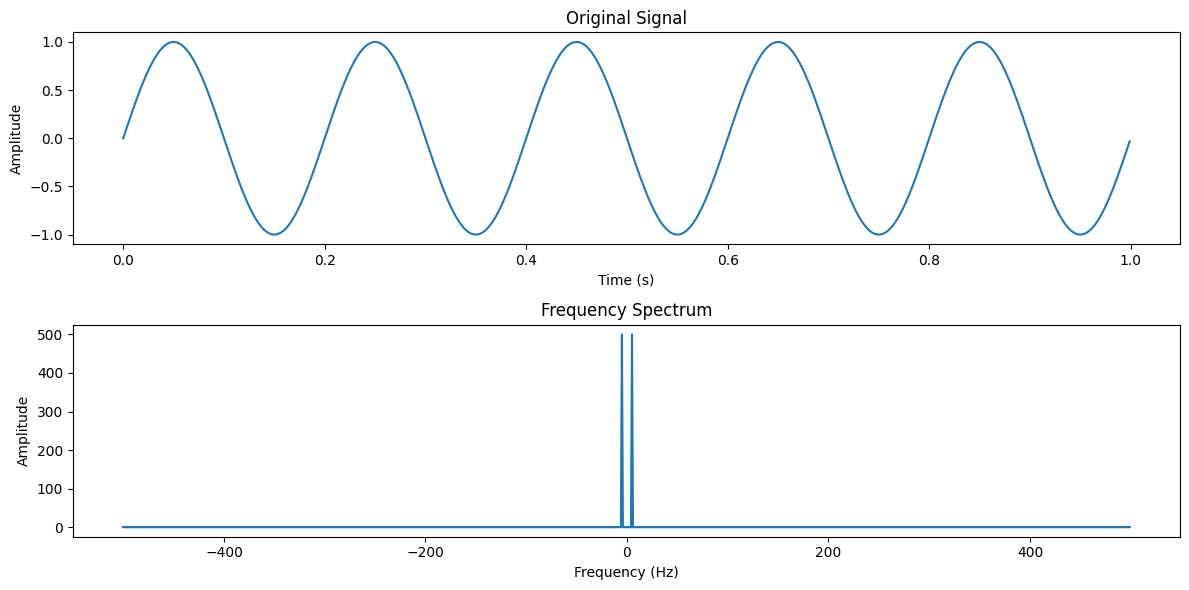

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一个信号
fs = 1000  # 采样频率
t = np.arange(0, 1, 1/fs)  # 时间数组
freq = 5  # 信号频率
signal = np.sin(2 * np.pi * freq * t)

# 进行 FFT
fft_result = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(fft_result), 1/fs)

# 绘制原始信号和频谱图
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(fft_freq, np.abs(fft_result))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# space
# fft_result = torch.fft.rfft(inputs, dim=1)
# magnitude_spectrum = torch.abs(fft_result[:, :256])  #[256, 512]

In [2]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rc("font", family='Microsoft YaHei')

# 读取MAT文件   
data1 = loadmat('0_0.mat')  # 正常信号
data2 = loadmat('21_1.mat') # 0.021英寸 内圈
data3 = loadmat('21_2.mat') # 0.021英寸 滚珠
data4 = loadmat('21_3.mat') # 0.021英寸 外圈
# 注意，读取出来的data是字典格式，可以通过函数type(data)查看。 

In [3]:
file_names = ['0_0.mat','21_1.mat','21_2.mat','21_3.mat']

for file in file_names:
    # 读取MAT文件
    data = loadmat(f'matfiles/{file}')
    print(list(data.keys()))

['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM']
['__header__', '__version__', '__globals__', 'X209_DE_time', 'X209_FE_time', 'X209_BA_time', 'X209RPM']
['__header__', '__version__', '__globals__', 'X222_DE_time', 'X222_FE_time', 'X222_BA_time', 'X222RPM']
['__header__', '__version__', '__globals__', 'X234_DE_time', 'X234_FE_time', 'X234_BA_time', 'X234RPM']


In [4]:
# DE - drive end accelerometer data 驱动端加速度数据
data_list1 = data1['X097_DE_time'].reshape(-1) 
data_list2 = data2['X209_DE_time'].reshape(-1)  
data_list3 = data3['X222_DE_time'].reshape(-1) 
data_list4 = data4['X234_DE_time'].reshape(-1) 

time_step= 1024
# 划窗取值（1024）
data_list1 = data_list1[0:time_step]
data_list2 = data_list2[0:time_step]
data_list3 = data_list3[0:time_step]
data_list4 = data_list4[0:time_step]

x_list = [x for x in range(time_step)]

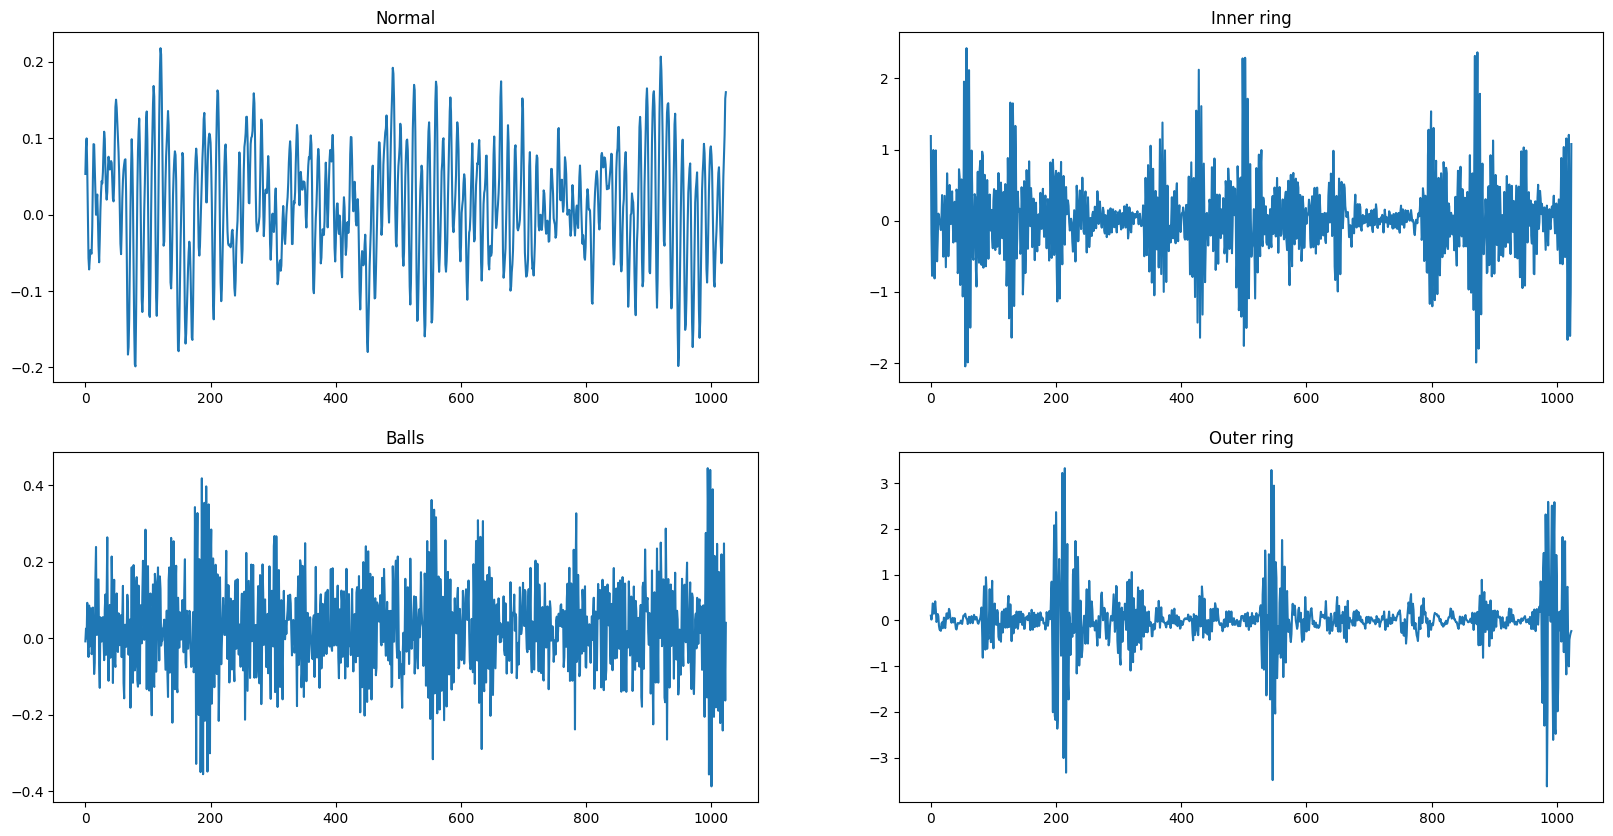

In [5]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(data_list1)
plt.title('Normal')
plt.subplot(2,2,2)
plt.plot(data_list2)
plt.title('Inner ring')
plt.subplot(2,2,3)
plt.plot(data_list3)
plt.title('Balls')
plt.subplot(2,2,4)
plt.plot(data_list4)
plt.title('Outer ring')

plt.show()

快速傅里叶变换FFT

In [6]:
fs = 1024
# 进行 FFT
fft_result1 = np.fft.fft(data_list1)
fft_freq1 = np.fft.fftfreq(len(fft_result1), 1/fs)

fft_result2 = np.fft.fft(data_list2)
fft_freq2 = np.fft.fftfreq(len(fft_result2), 1/fs)

fft_result3 = np.fft.fft(data_list3)
fft_freq3 = np.fft.fftfreq(len(fft_result3), 1/fs)

fft_result4 = np.fft.fft(data_list4)
fft_freq4 = np.fft.fftfreq(len(fft_result4), 1/fs)

In [7]:
fft_result1.shape

(1024,)

In [8]:
fft_result1

array([12.71907138+0.j        , -0.48379031+0.06810302j,
        0.02028636+0.21942104j, ..., -0.329384  -1.94082436j,
        0.02028636-0.21942104j, -0.48379031-0.06810302j])

In [9]:
magnitude_spectrum = np.abs(fft_result1)
magnitude_spectrum

array([12.71907138,  0.48856021,  0.22035682, ...,  1.9685764 ,
        0.22035682,  0.48856021])

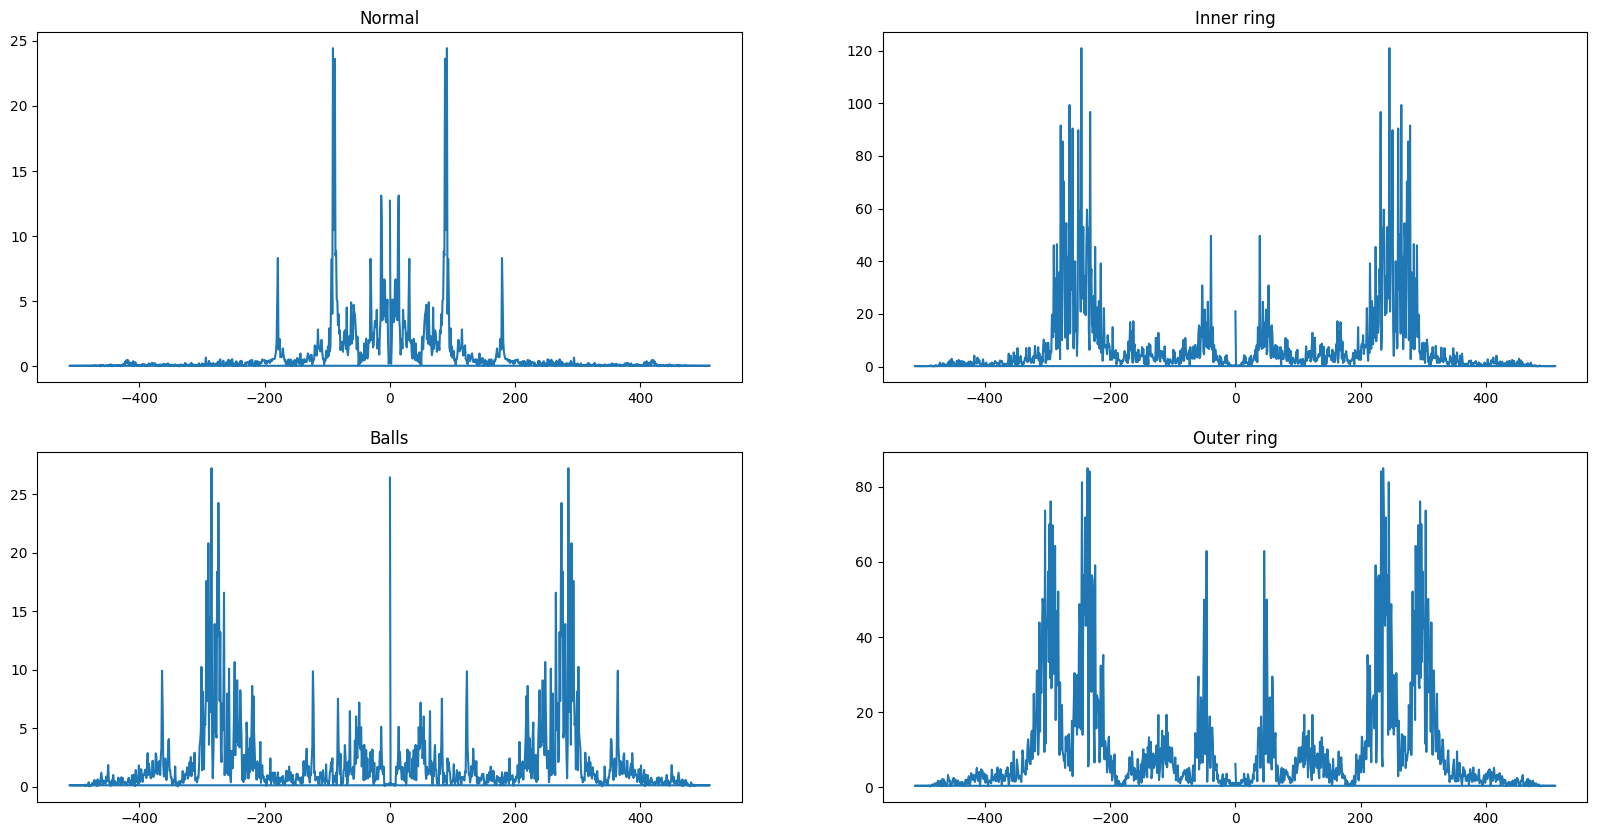

In [10]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(fft_freq1, np.abs(fft_result1))
plt.title('Normal')
plt.subplot(2,2,2)
plt.plot(fft_freq2, np.abs(fft_result2))
plt.title('Inner ring')
plt.subplot(2,2,3)
plt.plot(fft_freq3, np.abs(fft_result3))
plt.title('Balls')
plt.subplot(2,2,4)
plt.plot(fft_freq4, np.abs(fft_result4))
plt.title('Outer ring')

plt.show()